## Radar Gage Intercomparisons

In [1]:
%matplotlib inline
%load_ext autoreload
from rain import *
from common import get_index, choose_group, map_rain, get_resample_kwargs
%aimport rain
%aimport common

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = Rain(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = Rain(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [2]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/Version2/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101, units='mm')
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)

rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

### Let's Explore!

In [ ]:
%autoreload

In [3]:
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()
p.save_path = './output/test/'

In [4]:
p.rate.loc[:,:,'RG101'] = np.nan

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


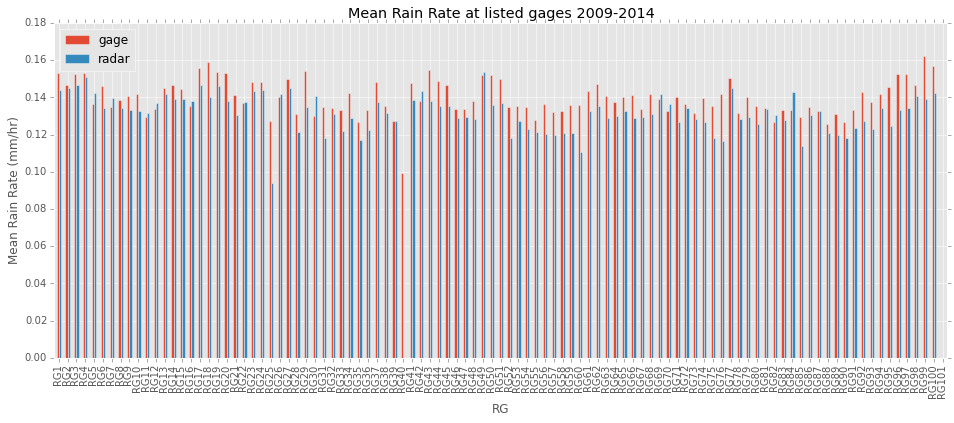

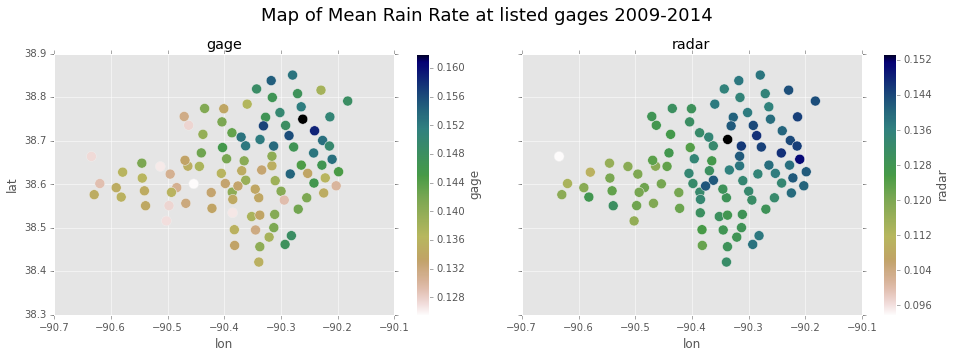

In [5]:
p.plot_rate(gage=list(get_index(p.rate, 'RG')[1]), map=True)

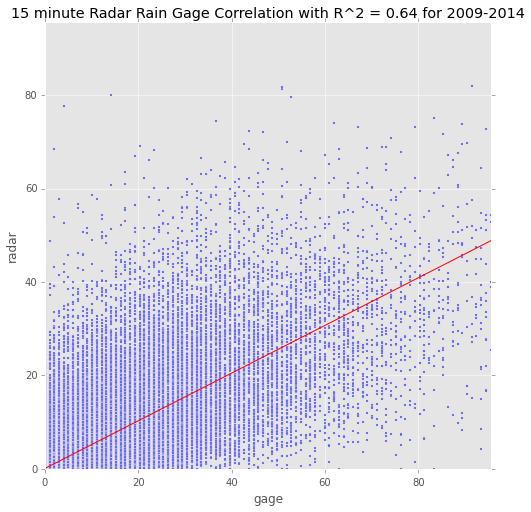

In [6]:
p.plot_correlation()

In [7]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

1.0244701402211416

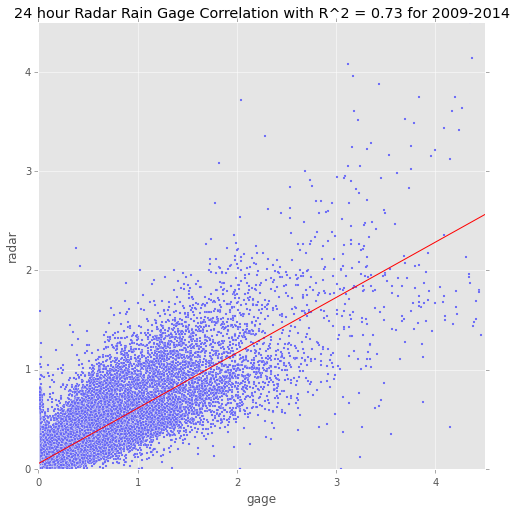

In [8]:
p.plot_correlation(time_step='24H', base=12)

In [9]:
RMSE = (np.nanmean((p.df.gage-p.df.radar)**2))**.5
RMSE

0.21393956010100867

### Comparison Plots of relative rain rates

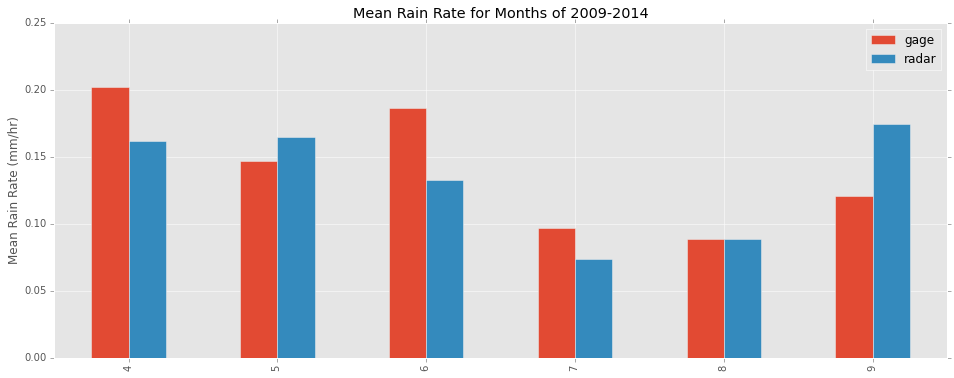

In [10]:
p.plot_rate(interval='seasonal')

In [ ]:
p.rate.groupby(p.rate.axes[1].month).mean().mean(axis=2).plot(kind='bar', figsize=(16,6))

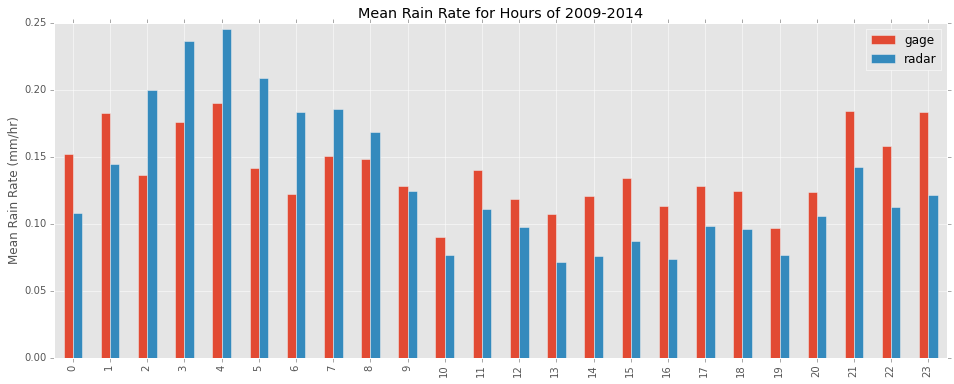

In [11]:
p.plot_rate(interval='diurnal')

In [ ]:
p.rate.groupby(p.rate.axes[1].hour).mean().mean(axis=2).plot(kind='bar', figsize=(16,6))

### Comparison of probabilities of rain

Choose you threshold carefully. You will notice that it makes a big difference in the results

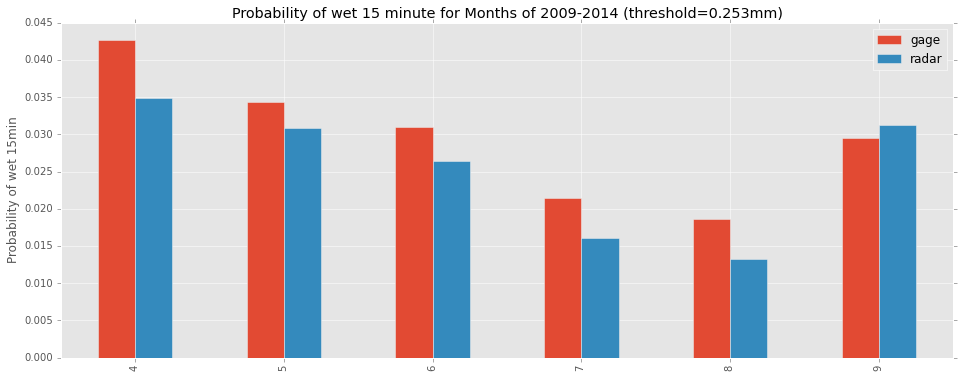

In [12]:
p.plot_prob_wet(interval='seasonal')

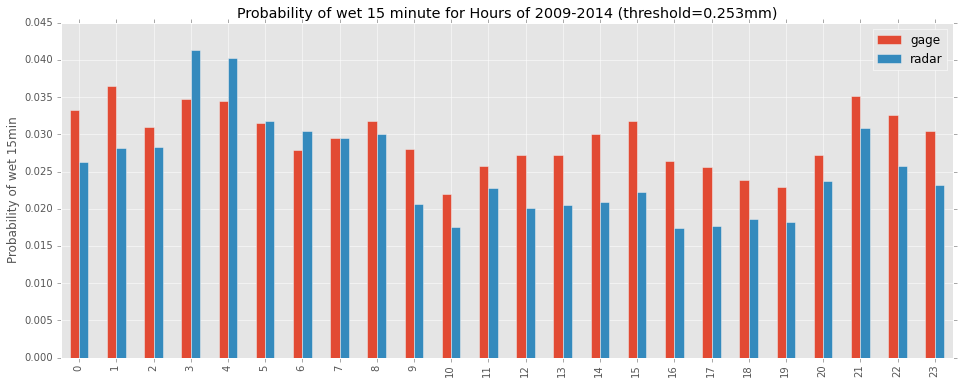

In [13]:
p.plot_prob_wet(interval='diurnal')

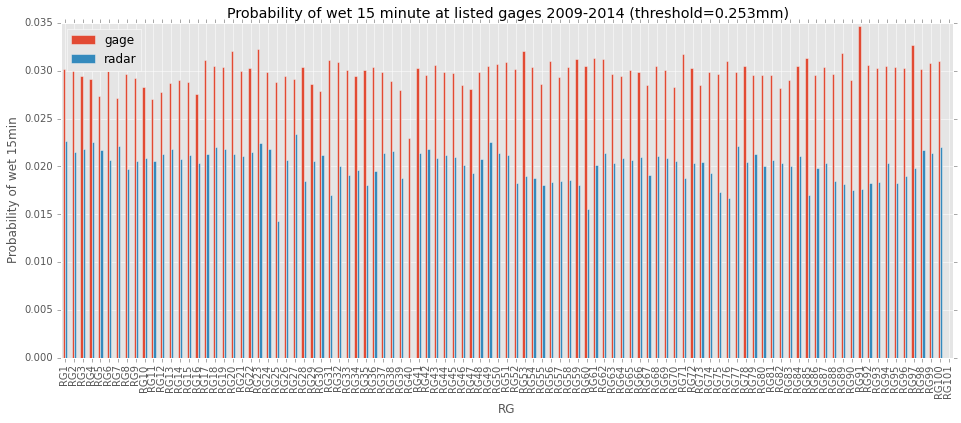

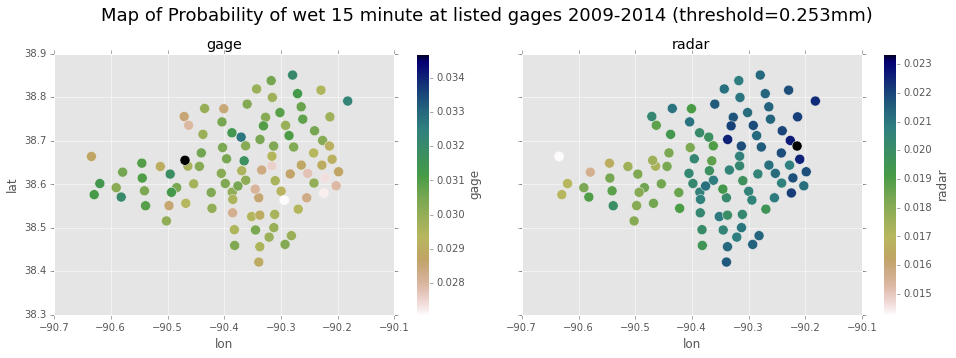

In [14]:
p.plot_prob_wet(gage=list(get_index(p.rate,'RG')[1]), map=True)

In [ ]:
p.thresh = .253*4

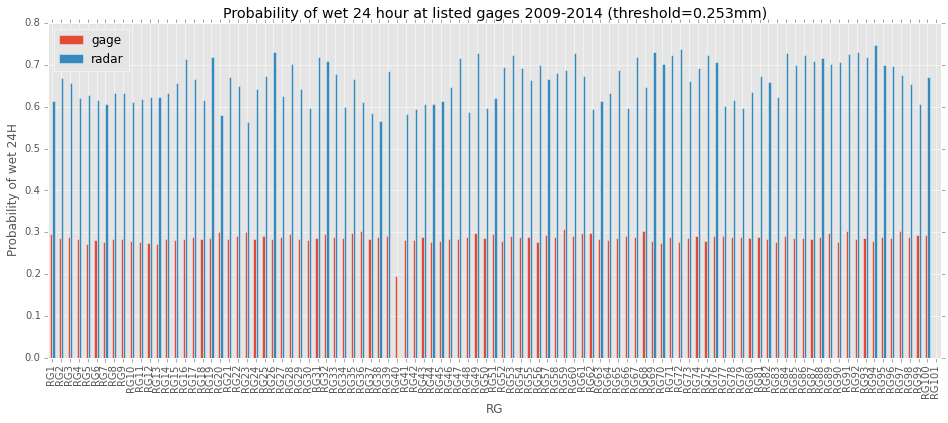

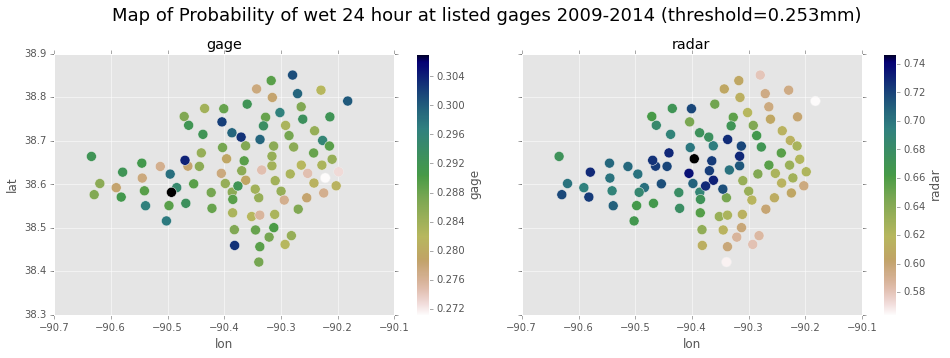

In [15]:
p.plot_prob_wet(gage=list(get_index(p.rate,'RG')[1]), time_step='24H', base=12, map=True)

### Plot the rainfall in space using shaded points

In [16]:
daily = p.rate.resample('24H', base=12, **get_resample_kwargs(p.rate))
day = p.ll.join(daily.to_frame().loc['2011-06-26 12:00:00'])
day = day[day.lat > -200]

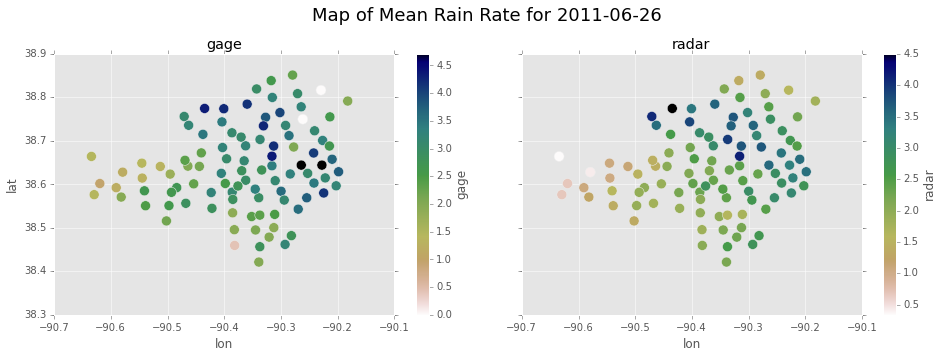

In [17]:
map_rain(day, p.save_path, 'Map of Mean Rain Rate for 2011-06-26')